<a href="https://colab.research.google.com/github/MORIOMKAMAL/Computer-vision/blob/main/class_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

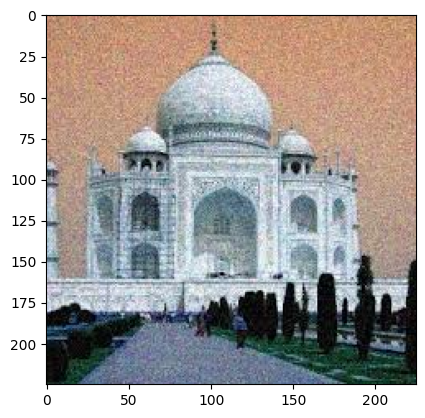

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/taj.jpeg')
plt.imshow(img)
plt.show()


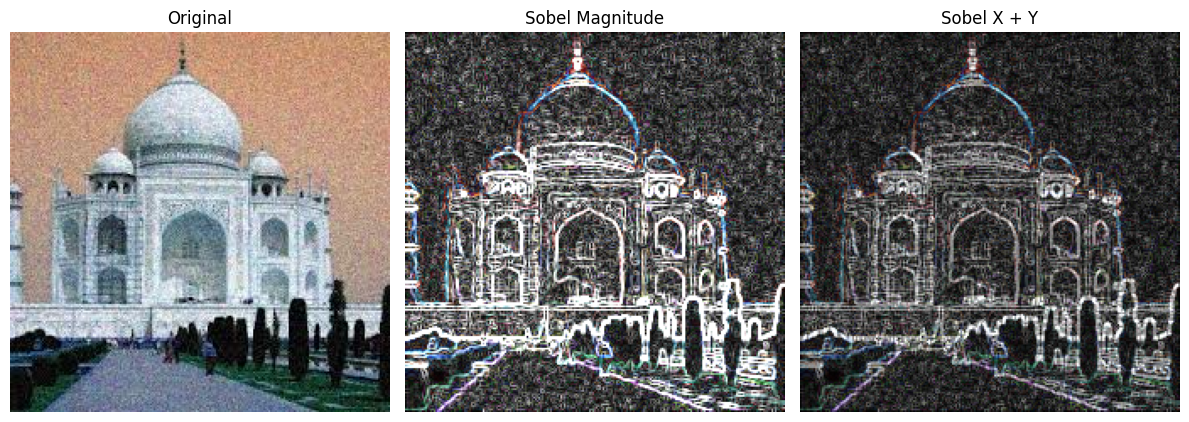

In [4]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Gx
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Gy

magnitude = np.sqrt(sobelx**2 + sobely**2)
magnitude = np.uint8(np.clip(magnitude, 0, 255))

magnitude_display = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.title('Original'), plt.imshow(img, cmap='gray'), plt.axis('off')
plt.subplot(1, 3, 2), plt.title('Sobel Magnitude'), plt.imshow(magnitude_display, cmap='gray'), plt.axis('off')
plt.subplot(1, 3, 3), plt.title('Sobel X + Y'), plt.imshow(cv2.addWeighted(cv2.convertScaleAbs(sobelx), 0.5,
                                                                          cv2.convertScaleAbs(sobely), 0.5, 0)), plt.axis('off')
plt.tight_layout()
plt.show()

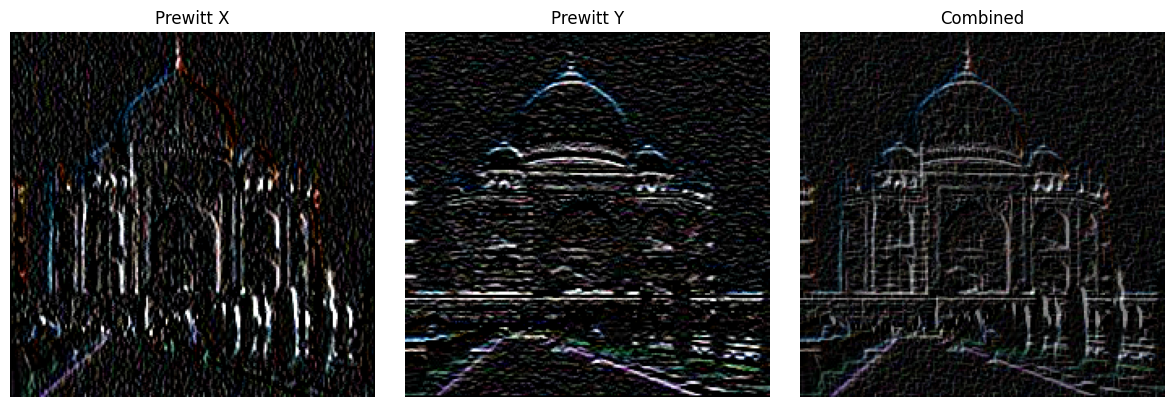

In [6]:
kernelx = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]], dtype=np.float32)

kernely = np.array([[-1, -1, -1],
                    [ 0,  0,  0],
                    [ 1,  1,  1]], dtype=np.float32)

prewittx = cv2.filter2D(img, -1, kernelx)
prewitty = cv2.filter2D(img, -1, kernely)

prewitt_combined = cv2.addWeighted(prewittx, 0.5, prewitty, 0.5, 0)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(prewittx, cmap='gray'), plt.title('Prewitt X'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(prewitty, cmap='gray'), plt.title('Prewitt Y'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(prewitt_combined, cmap='gray'), plt.title('Combined'), plt.axis('off')
plt.tight_layout()
plt.show()

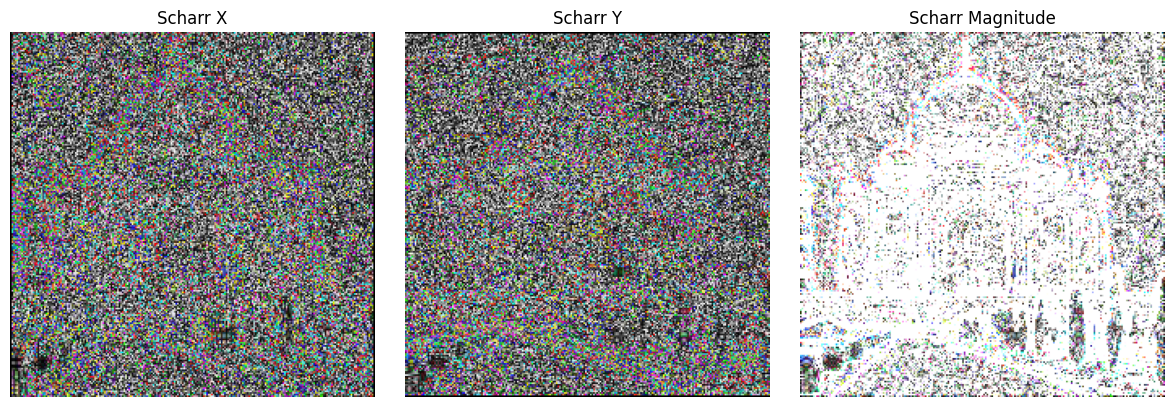

In [7]:
scharr_x = cv2.Scharr(img, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(img, cv2.CV_64F, 0, 1)

scharr_magnitude = cv2.magnitude(scharr_x, scharr_y)

scharr_x = np.uint8(np.absolute(scharr_x))
scharr_y = np.uint8(np.absolute(scharr_y))
scharr_magnitude = np.uint8(np.clip(scharr_magnitude, 0, 255))

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(scharr_x, cmap='gray'), plt.title('Scharr X'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(scharr_y, cmap='gray'), plt.title('Scharr Y'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(scharr_magnitude, cmap='gray'), plt.title('Scharr Magnitude'), plt.axis('off')
plt.tight_layout()
plt.show()

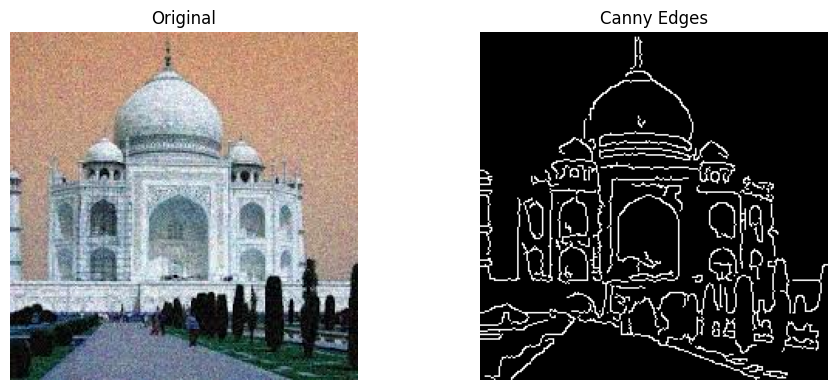

In [8]:
blurred = cv2.GaussianBlur(img, (5, 5), 1.4)

edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(edges, cmap='gray'), plt.title('Canny Edges'), plt.axis('off')
plt.tight_layout()
plt.show()

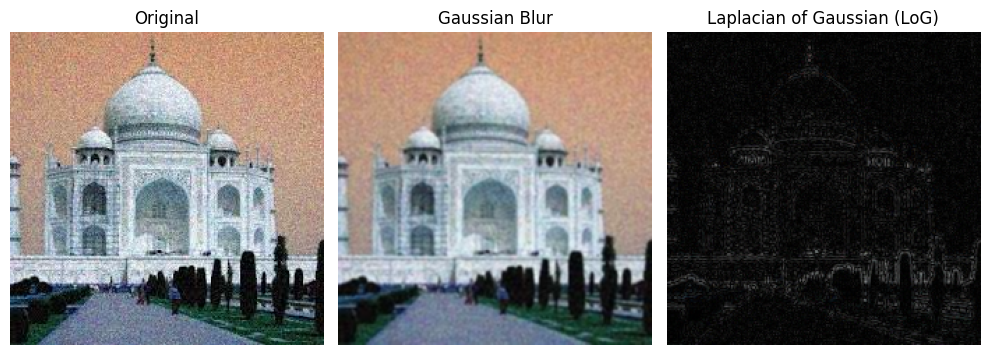

In [9]:
blurred = cv2.GaussianBlur(img, (3, 3), 0)

log = cv2.Laplacian(blurred, cv2.CV_64F)

log_abs = cv2.convertScaleAbs(log)

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(blurred, cmap='gray'), plt.title('Gaussian Blur'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(log_abs, cmap='gray'), plt.title('Laplacian of Gaussian (LoG)'), plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
def load_images_from_folder(folder_path, start_index=0, end_index=None):
    """
    Load images from a folder within the specified index range.

    Args:
        folder_path (str): Path to the image folder.
        start_index (int): Starting index to load images from.
        end_index (int or None): Ending index (exclusive). If None, loads till the end.

    Returns:
        List of tuples: [(filename, image ndarray), ...]
    """
    image_files = sorted([
        f for f in os.listdir(folder_path)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ])

    if end_index is not None:
        image_files = image_files[start_index:end_index]
    else:
        image_files = image_files[start_index:]

    loaded_images = []
    for i, filename in enumerate(image_files, start=start_index):
        path = os.path.join(folder_path, filename)
        img = cv2.imread(path)
        if img is not None:
            loaded_images.append((filename, img))
            print(f"[{i+1}] Loaded: {filename}")
        else:
            print(f"[{i+1}] Failed to load: {filename}")

    print(f"\n✅ Total images loaded: {len(loaded_images)}")
    return loaded_images